# This is a notebook that demonstrates data cleaning and running a Principal Component Analysis

# Part I- Research Question

## A. Research Question: Taking account the medical data, which variables cause high risk of admission?

### Installing the needed packages for the performance assessment.

In [13]:
install.packages("readr")
install.packages("plyr")
install.packages("dplyr")
install.packages("ggplot2")
install.packages("factoextra")
install.packages("FactoMineR")
install.packages("tidyverse")
install.packages("mice")
install.packages("outliers")
install.packages("IDPmisc")

Warning message:
"package 'readr' is in use and will not be installed"
Warning message:
"package 'plyr' is in use and will not be installed"
Warning message:
"package 'dplyr' is in use and will not be installed"
Warning message:
"package 'ggplot2' is in use and will not be installed"
Warning message:
"package 'factoextra' is in use and will not be installed"
Warning message:
"package 'FactoMineR' is in use and will not be installed"
Warning message:
"package 'tidyverse' is in use and will not be installed"
Warning message:
"package 'mice' is in use and will not be installed"
Warning message:
"package 'outliers' is in use and will not be installed"
Warning message:
"package 'IDPmisc' is in use and will not be installed"


### Loading the packages that are needed for the data cleaning process.

In [14]:
library(readr) # for importing data
library(plyr) # to change the data type to numeric.
library(dplyr) # is used for data manipulation
library(ggplot2) # for visualization
library(factoextra) # to conduct the PCA
library(FactoMineR) # to conduct the PCA
library(tidyverse) # to tidy and clean the data
library(mice) # for null value mitigation
library(outliers) # to check for outliers
library(IDPmisc)

### Loading in the medical data set to begin cleaning it.

In [15]:
medical_raw_data <- read_csv("~/WGU/Data Cleaning/Medical_Data/medical_raw_data.csv", show_col_types= FALSE)
# Viewing my data's first 5 rows to see what I have to work with using the head command.
head(medical_raw_data, 5)

...1,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,TotalCharge,Additional_charges,Survey_TimelyAdmin,Survey_TimelyTreatment,Survey_TimelyVisits,Survey_Reliability,Survey_Options,Survey_HoursTreatment,Survey_CourteousStaff,Survey_ActiveListening
<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,NA,NA,NA,NA,NA,NA,35621,34.34960,...,3191.049,17939.403,3,3,2,2,4,3,3,4
2,2,NA,NA,NA,NA,NA,NA,32446,30.84513,...,4214.905,17612.998,3,4,3,4,4,4,3,3
3,3,NA,NA,NA,NA,NA,NA,57110,43.54321,...,2177.587,17505.192,2,4,4,4,3,4,3,3
4,4,NA,NA,NA,NA,NA,NA,56072,43.89744,...,2465.119,12993.437,3,5,5,3,4,5,5,5
5,5,NA,NA,NA,NA,NA,NA,23181,37.59894,...,1885.655,3716.526,2,1,3,3,5,3,4,3


##### Viewing all of the column names below to see what I have to work with.

In [16]:
colnames(medical_raw_data)

[1] "...1"                   "CaseOrder"              "Customer_id"           
 [4] "Interaction"            "UID"                    "City"                  
 [7] "State"                  "County"                 "Zip"                   
[10] "Lat"                    "Lng"                    "Population"            
[13] "Area"                   "Timezone"               "Job"                   
[16] "Children"               "Age"                    "Education"             
[19] "Employment"             "Household_Income"       "Marital"               
[22] "Gender"                 "ReAdmis"                "VitD_levels"           
[25] "Doc_visits"             "Full_meals_eaten"       "VitD_supp"             
[28] "Soft_drink"             "Initial_admin"          "HighBlood"             
[31] "Stroke"                 "Complication_risk"      "Overweight"            
[34] "Arthritis"              "Diabetes"               "Hyperlipidemia"        
[37] "BackPain"               "Anxiety"                "Allergic_rhinitis"     
[40] "Reflux_esophagitis"     "Asthma"                 "Services"              
[43] "Initial_days"           "TotalCharge"            "Additional_charges"    
[46] "Survey_TimelyAdmin"     "Survey_TimelyTreatment" "Survey_TimelyVisits"   
[49] "Survey_Reliability"     "Survey_Options"         "Survey_HoursTreatment" 
[52] "Survey_CourteousStaff"  "Survey_ActiveListening"

## Part I- B. Variable Description

In [17]:
str(medical_raw_data)

spec_tbl_df [10,000 x 53] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ...1                  : num [1:10000] 1 2 3 4 5 6 7 8 9 10 ...
 $ CaseOrder             : num [1:10000] 1 2 3 4 5 6 7 8 9 10 ...
 $ Customer_id           : logi [1:10000] NA NA NA NA NA NA ...
 $ Interaction           : logi [1:10000] NA NA NA NA NA NA ...
 $ UID                   : logi [1:10000] NA NA NA NA NA NA ...
 $ City                  : logi [1:10000] NA NA NA NA NA NA ...
 $ State                 : logi [1:10000] NA NA NA NA NA NA ...
 $ County                : logi [1:10000] NA NA NA NA NA NA ...
 $ Zip                   : num [1:10000] 35621 32446 57110 56072 23181 ...
 $ Lat                   : num [1:10000] 34.3 30.8 43.5 43.9 37.6 ...
 $ Lng                   : num [1:10000] -86.7 -85.2 -96.6 -93.5 -76.9 ...
 $ Population            : num [1:10000] 2951 11303 17125 2162 5287 ...
 $ Area                  : logi [1:10000] NA NA NA NA NA NA ...
 $ Timezone              : logi [1:10000] NA NA NA NA NA NA ..

# Variable and data type description:
- ...1: is an unnamed integer index
- CaseOrder: integer index to preserve the original order of the raw data
- Customer_id: character string that is unique and identifies each patient through an ID
- Interaction: character string that is unique and identifies patient transactions, procedures, and admissions
- UID: character string that is unique and identifies patient transactions, procedures, and admissions
- City: character string indicating patient's city of residence; listed on the billing statement
- State: character string indicating patient's state of residence; listed on the billing statement
- County: character string indicating patient's county of residence; listed on the billing statement
- Zip: integer indicating patient's zip code of residence; listed on the billing statement
- Lat: continuous numeric of latitude GPS coordinates of residence; listed on the billing statement
- Lng: continuous numeric of longitude GPS coordinates of residence; listed on the billing statement
- Population: integer value indicating population within a mile radius of a patient, based on census data
- Area: a nominal categorical indicating character string area type (rural, urban, suburban), based on unofficial census data
- Timezone: a nominal categorical string indicating character string indicating the time zone of patient residence based on the patient’s sign-up information
- Job: a nominal categorical string indicating the job of the patient (or primary insurance holder) as reported in the admissions information
- Children: float indicating the number of children in the patient’s household as reported in the admissions information
- Age: float indicating the age of the patient as reported in admissions information
- Education: a nominal categorical string indicating the highest earned degree of a patient as reported in admissions information
- Employment: a categorical string indicating the employment status of a patient as reported in admissions information
- Income: numerical indicating the annual income of the patient (or primary insurance holder) as reported at the time of admission
- Marital: a nominal categorical string indicating the marital status of the patient (or primary insurance holder) as reported on admission information
- Gender: a nominal categorical string indicating the customer's self-identification as male, female, or nonbinary
- ReAdmis: a binary categorical string indicating whether the patient was readmitted within a month of release or not (yes, no)
- VitD_levels: continuous numerical indicating the patient’s vitamin D levels as measured in ng/mL
- Doc_visits: integer indicating the number of times the primary physician visited the patient during the initial hospitalization
- Full_meals_eaten: integer the number of complete meals the patient ate while hospitalized (partial meals count as 0, and some patients had more than three meals in a day if requested)
- VitD_supp: integer indicating the number of times that vitamin D supplements were administered to the patient 
- Soft_drink: a binary categorical string indicating whether the patient habitually drinks three or more sodas in a day (yes, no)
- Initial_admin: a nominal categorical string indicating how the patient was admitted into the hospital initially (emergency admission, elective admission, observation)
- HighBlood: a character string indicating whether the patient has high blood pressure (yes, no)
- Stroke: a character string indicating whether the patient has had a stroke (yes, no)
- Complication_risk: a string indicating the level of complication risk for the patient as assessed by a primary patient assessment (high, medium, low)
- Overweight: an integer indicating whether the patient is considered overweight based on age, gender, and height (yes, no)
- Arthritis: a character string indicating whether the patient has arthritis (yes, no)
- Diabetes: a character string indicating whether the patient has diabetes (yes, no)
- Hyperlipidemia: a character string indicating whether the patient has hyperlipidemia (yes, no)
- BackPain: a character string indicating whether the patient has chronic back pain (yes, no)
- Anxiety: an integer indicating whether the patient has an anxiety disorder (yes, no)
- Allergic_rhinitis: a character string indicating whether the patient has allergic rhinitis (yes, no)
- Reflux_esophigitis: a character string indicating whether the patient has reflux esophagitis (yes, no)
- Asthma: a character string indicating whether the patient has asthma (yes, no)
- Services: a character string indicating primary service the patient received while hospitalized (blood work, intravenous, CT scan, MRI)
- Initial_days: numerical, indicating the number of days the patient stayed in the hospital during the initial visit
- TotalCharge: numerical, indicating the amount charged to the patient daily. This value reflects an average per patient based on the total charge divided by the number of days hospitalized. This amount reflects the typical charges billed to patients, not including specialized treatments.
- Additional_charges: numerical, indicating the average amount charged to the patient for miscellaneous procedures, treatments, medicines, anesthesiology, etc.
The following variables describe an eight-question survey asking customers to rate their experience on a scale from 1 to 8. The number one represents the most important and 8 represents the least important:
- Item1: an integer that describes a timely admission
- Item2: an integer that describes a timely treatment
- Item3: an integer that describes timely visits
- Item4: an integer that describes the reliability
- Item5: an integer that describes options
- Item6: an integer that describes hours of treatment
- Item7: an integer that describes courteous staff
- Item8: an integer that describes evidence of active listening from a doctor

# Part II: Data-Cleaning Plan

## C. Plan
- 1. Rename misleading variables
- 2. Missing data
    - Find missing data
    - Identify the columns the missing data is in
- 3. Convert categorical data types into numeric
- 4. Check for outliers using boxplot and distribution graphs
- 5. Run a hypothesis test for those variables using a Grubbs Test
- 6. Mitigate NAs
- 7. Standardize the variables that need to be standardized
- 8. To assess the quality and clean the data, I will be using R which was created by statisticians. R has a massive library of packages for data cleaning, exploration, statistical analysis, machine modeling and learning, and reporting. I will be using the following packages to support my data cleaning:
    - readr is used to import data (Larose & Larose, 2019)
    - dplyr is used for data manipulation (Hadley Wickham & Garrett Grolemund, 2017)
    - ggplot2 is used for visualization/plots (Hadley Wickham & Garrett Grolemund, 2017)
    - FactoMineR is used to conduct the PCA (Hadley Wickham & Garrett Grolemund, 2017)
    - factoextra is used to conduct the PCA (Hadley Wickham & Garrett Grolemund, 2017)
    - tidyverse is used to tidy and clean the data (Larose & Larose, 2019)
    - plyr is used to change the data type to numeric. (Larose & Larose, 2019)
    - mice is used for null value mitigation (Hadley Wickham & Garrett Grolemund, 2017)
    - outliers is used to check for outliers (Hadley Wickham & Garrett Grolemund, 2017)
    - IDPmisc is use to make sure we don't have infinite or missing values
- 9. I have provided the code in its entirety below to identify the anomalies in the data

# Part III- D: Apply the Cleaning Plan

# 1- First, I renamed the survey variables to names that are easier to understand for cleaning purposes since the survey questions were called items.

In [18]:
names(medical_raw_data)[names(medical_raw_data) == 'Income'] <- 'Household_Income'
names(medical_raw_data)[names(medical_raw_data) == 'Item1'] <- 'Survey_TimelyAdmin'
names(medical_raw_data)[names(medical_raw_data) == 'Item2'] <- 'Survey_TimelyTreatment'
names(medical_raw_data)[names(medical_raw_data) == 'Item3'] <- 'Survey_TimelyVisits'
names(medical_raw_data)[names(medical_raw_data) == 'Item4'] <- 'Survey_Reliability'
names(medical_raw_data)[names(medical_raw_data) == 'Item5'] <- 'Survey_Options'
names(medical_raw_data)[names(medical_raw_data) == 'Item6'] <- 'Survey_HoursTreatment'
names(medical_raw_data)[names(medical_raw_data) == 'Item7'] <- 'Survey_CourteousStaff'
names(medical_raw_data)[names(medical_raw_data) == 'Item8'] <- 'Survey_ActiveListening'
head(medical_raw_data)

...1,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,TotalCharge,Additional_charges,Survey_TimelyAdmin,Survey_TimelyTreatment,Survey_TimelyVisits,Survey_Reliability,Survey_Options,Survey_HoursTreatment,Survey_CourteousStaff,Survey_ActiveListening
<dbl>,<dbl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<lgl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,NA,NA,NA,NA,NA,NA,35621,34.34960,...,3191.049,17939.403,3,3,2,2,4,3,3,4
2,2,NA,NA,NA,NA,NA,NA,32446,30.84513,...,4214.905,17612.998,3,4,3,4,4,4,3,3
3,3,NA,NA,NA,NA,NA,NA,57110,43.54321,...,2177.587,17505.192,2,4,4,4,3,4,3,3
4,4,NA,NA,NA,NA,NA,NA,56072,43.89744,...,2465.119,12993.437,3,5,5,3,4,5,5,5
5,5,NA,NA,NA,NA,NA,NA,23181,37.59894,...,1885.655,3716.526,2,1,3,3,5,3,4,3
6,6,NA,NA,NA,NA,NA,NA,74423,35.67302,...,2774.090,12742.590,4,5,4,4,3,5,4,6


# 2- Search for NA values in columns across the entire dataset

In [20]:
sum(is.na(medical_raw_data))
# There are 270,000 total NA values.

[1] 270000

In [21]:
colSums(is.na(medical_raw_data))

...1              CaseOrder            Customer_id 
                     0                      0                  10000 
           Interaction                    UID                   City 
                 10000                  10000                  10000 
                 State                 County                    Zip 
                 10000                  10000                      0 
                   Lat                    Lng             Population 
                     0                      0                      0 
                  Area               Timezone                    Job 
                 10000                  10000                  10000 
              Children                    Age              Education 
                     0                      0                  10000 
            Employment       Household_Income                Marital 
                 10000                      0                  10000 
                Gender                ReAdmis            VitD_levels 
                 10000                  10000                      0 
            Doc_visits       Full_meals_eaten              VitD_supp 
                     0                      0                      0 
            Soft_drink          Initial_admin              HighBlood 
                 10000                  10000                  10000 
                Stroke      Complication_risk             Overweight 
                 10000                  10000                      0 
             Arthritis               Diabetes         Hyperlipidemia 
                 10000                  10000                  10000 
              BackPain                Anxiety      Allergic_rhinitis 
                 10000                      0                  10000 
    Reflux_esophagitis                 Asthma               Services 
                 10000                  10000                  10000 
          Initial_days            TotalCharge     Additional_charges 
                     0                      0                      0 
    Survey_TimelyAdmin Survey_TimelyTreatment    Survey_TimelyVisits 
                     0                      0                      0 
    Survey_Reliability         Survey_Options  Survey_HoursTreatment 
                     0                      0                      0 
 Survey_CourteousStaff Survey_ActiveListening 
                     0                      0

### The results for NA values in columns are the following:
- Children = 2588
- Age = 2414
- Household_Income = 2464
- Soft_drink = 2467
- Overweight = 982
- Anxiety = 984
- Initial_days = 1056

#### The output is NULL since the variables contain NA values. This confirms that, indeed, this is correct. Now, we take a look at the distribution using the mice packages, which is an excellent choice for large data to see the location. Let's use the md.pattern function to display all of the NULL values below.

,...1,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Household_Income,VitD_levels,...,Complication_risk,Arthritis,Diabetes,Hyperlipidemia,BackPain,Allergic_rhinitis,Reflux_esophagitis,Asthma,Services,
10000,1,1,1,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,27
,0,0,0,0,0,0,0,0,0,0,...,10000,10000,10000,10000,10000,10000,10000,10000,10000,270000


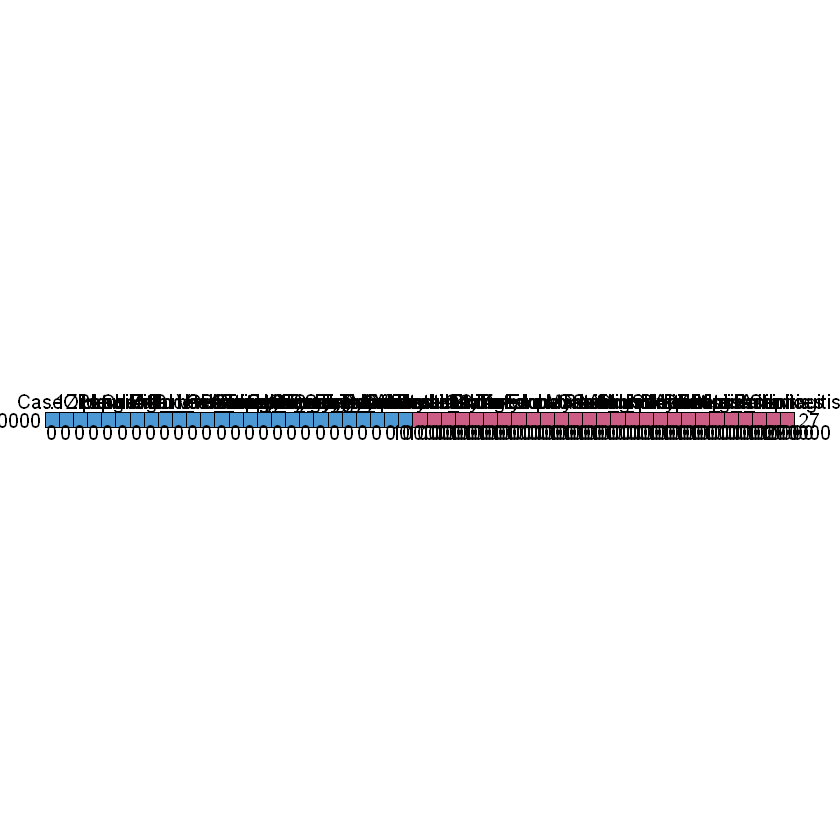

In [22]:
md.pattern(medical_raw_data) # (Hadley Wickham & Garrett Grolemund, 2017)

### After taking a look at the visual above, it appears that half of the data has the most missing values. In the following codes, we will look at the columns in depth to see where the missing data is.

I am printing the name of the columns below:

In [23]:
colnames(medical_raw_data)

[1] "...1"                   "CaseOrder"              "Customer_id"           
 [4] "Interaction"            "UID"                    "City"                  
 [7] "State"                  "County"                 "Zip"                   
[10] "Lat"                    "Lng"                    "Population"            
[13] "Area"                   "Timezone"               "Job"                   
[16] "Children"               "Age"                    "Education"             
[19] "Employment"             "Household_Income"       "Marital"               
[22] "Gender"                 "ReAdmis"                "VitD_levels"           
[25] "Doc_visits"             "Full_meals_eaten"       "VitD_supp"             
[28] "Soft_drink"             "Initial_admin"          "HighBlood"             
[31] "Stroke"                 "Complication_risk"      "Overweight"            
[34] "Arthritis"              "Diabetes"               "Hyperlipidemia"        
[37] "BackPain"               "Anxiety"                "Allergic_rhinitis"     
[40] "Reflux_esophagitis"     "Asthma"                 "Services"              
[43] "Initial_days"           "TotalCharge"            "Additional_charges"    
[46] "Survey_TimelyAdmin"     "Survey_TimelyTreatment" "Survey_TimelyVisits"   
[49] "Survey_Reliability"     "Survey_Options"         "Survey_HoursTreatment" 
[52] "Survey_CourteousStaff"  "Survey_ActiveListening"

### I am printing the total number of the columns below:

In [24]:
ncol(medical_raw_data)

[1] 53

### I am printing the number of rows below:

In [25]:
nrow(medical_raw_data)

[1] 10000

### NAs will be addressed and/or at the end of the data cleaning process since there are a few more steps I will be taking before throughout the data cleaning process.

# 4- It is crucial to change any non-numeric data (categorical) into numeric data:

In [26]:
medical_raw_data$Customer_id <- as.numeric(medical_raw_data$Customer_id)
medical_raw_data$Interaction <- as.numeric(medical_raw_data$Interaction)
medical_raw_data$UID <- as.numeric(medical_raw_data$UID)
medical_raw_data$City <- as.numeric(medical_raw_data$City)
medical_raw_data$State <- as.numeric(medical_raw_data$State)
medical_raw_data$County <- as.numeric(medical_raw_data$County)
medical_raw_data$Area <- as.numeric(medical_raw_data$Area)
medical_raw_data$Timezone <- as.numeric(medical_raw_data$Timezone)
medical_raw_data$Job <- as.numeric(medical_raw_data$Job)
medical_raw_data$Education <- as.numeric(medical_raw_data$Education)
medical_raw_data$Employment <- as.numeric(medical_raw_data$Employment)
medical_raw_data$Marital <- as.numeric(medical_raw_data$Marital)
medical_raw_data$Gender <- as.numeric(medical_raw_data$Gender)
medical_raw_data$Employment <- as.numeric(medical_raw_data$Employment)
medical_raw_data$ReAdmis <- as.numeric(medical_raw_data$ReAdmis)
medical_raw_data$Soft_drink <- as.numeric(medical_raw_data$Soft_drink)
medical_raw_data$Initial_admin <- as.numeric(medical_raw_data$Initial_admin)
medical_raw_data$Initial_admin <- as.numeric(medical_raw_data$HighBlood)
medical_raw_data$Initial_admin <- as.numeric(medical_raw_data$Stroke)
medical_raw_data$Complication_risk <- as.numeric(medical_raw_data$Complication_risk)
medical_raw_data$Overweight <- as.numeric(medical_raw_data$Overweight)
medical_raw_data$Arthritis <- as.numeric(medical_raw_data$Arthritis)
medical_raw_data$Diabetes <- as.numeric(medical_raw_data$Diabetes)
medical_raw_data$Hyperlipidemia <- as.numeric(medical_raw_data$Hyperlipidemia)
medical_raw_data$BackPain <- as.numeric(medical_raw_data$BackPain)
medical_raw_data$Allergic_rhinitis <- as.numeric(medical_raw_data$Allergic_rhinitis)
medical_raw_data$Reflux_esophagitis <- as.numeric(medical_raw_data$Reflux_esophagitis)
medical_raw_data$Asthma <- as.numeric(medical_raw_data$Asthma)
medical_raw_data$Services <- as.numeric(medical_raw_data$Services)
medical_raw_data$CaseOrder <- as.numeric(medical_raw_data$CaseOrder)
medical_raw_data$Zip <- as.numeric(medical_raw_data$Zip)
medical_raw_data$Population <- as.numeric(medical_raw_data$Population)
medical_raw_data$Children <- as.numeric(medical_raw_data$Children)
medical_raw_data$Age <- as.numeric(medical_raw_data$Age)
medical_raw_data$Doc_visits <- as.numeric(medical_raw_data$Doc_visits)
medical_raw_data$Full_meals_eaten <- as.numeric(medical_raw_data$Full_meals_eaten)
medical_raw_data$VitD_supp  <- as.numeric(medical_raw_data$VitD_supp)
medical_raw_data$HighBlood  <- as.numeric(medical_raw_data$HighBlood)
medical_raw_data$Stroke  <- as.numeric(medical_raw_data$Stroke)
medical_raw_data$Anxiety  <- as.numeric(medical_raw_data$Anxiety)
medical_raw_data$Survey_TimelyAdmin  <- as.numeric(medical_raw_data$Survey_TimelyAdmin)
medical_raw_data$Survey_TimelyTreatment  <- as.numeric(medical_raw_data$Survey_TimelyTreatment)
medical_raw_data$Survey_Reliability  <- as.numeric(medical_raw_data$Survey_Reliability)
medical_raw_data$Survey_Options  <- as.numeric(medical_raw_data$Survey_Options)
medical_raw_data$Survey_HoursTreatment  <- as.numeric(medical_raw_data$Survey_HoursTreatment)
medical_raw_data$Survey_CourteousStaff  <- as.numeric(medical_raw_data$Survey_CourteousStaff)
medical_raw_data$Survey_ActiveListening  <- as.numeric(medical_raw_data$Survey_ActiveListening)
# (Hadley Wickham & Garrett Grolemund, 2017).

### I will make sure that the data is, indeed, converted all non-numerics into numerics using the following code:

In [27]:
str(medical_raw_data)

spec_tbl_df [10,000 x 53] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ ...1                  : num [1:10000] 1 2 3 4 5 6 7 8 9 10 ...
 $ CaseOrder             : num [1:10000] 1 2 3 4 5 6 7 8 9 10 ...
 $ Customer_id           : num [1:10000] NA NA NA NA NA NA NA NA NA NA ...
 $ Interaction           : num [1:10000] NA NA NA NA NA NA NA NA NA NA ...
 $ UID                   : num [1:10000] NA NA NA NA NA NA NA NA NA NA ...
 $ City                  : num [1:10000] NA NA NA NA NA NA NA NA NA NA ...
 $ State                 : num [1:10000] NA NA NA NA NA NA NA NA NA NA ...
 $ County                : num [1:10000] NA NA NA NA NA NA NA NA NA NA ...
 $ Zip                   : num [1:10000] 35621 32446 57110 56072 23181 ...
 $ Lat                   : num [1:10000] 34.3 30.8 43.5 43.9 37.6 ...
 $ Lng                   : num [1:10000] -86.7 -85.2 -96.6 -93.5 -76.9 ...
 $ Population            : num [1:10000] 2951 11303 17125 2162 5287 ...
 $ Area                  : num [1:10000] NA NA NA NA NA NA N

##### *Success! All of the variables from the data set that was not numeric are, indeed, numeric.*

# 4- Next, it is also vital to identify outliers using the summary function, boxplots, and check for normal probability using plots to further confirm this.

What does min, 1st quartile, median, mean, 3rd quartile, and max mean?
- Min.: is the minimum value of the data set (per variable)
- 1st Qu.: is the middle value (median) of the lower half of the data (per variable)
- Median: is the mid-point of the data and marks the data in half and demonstrates that divided into two parts. Half is greater than the midpoint and half is less.
- Mean: is the average value of the data.
- 3rd Qu.: is the middle value (median) of the upper half of the data (per variable)
- Max: the high data point of the dataset (per variable), not including any outliers.

## *I will use the summary() function to display all of the NULL values below.*

In [28]:
summary(medical_raw_data) # (Hadley Wickham & Garrett Grolemund, 2017)

      ...1         CaseOrder      Customer_id     Interaction   
 Min.   :    1   Min.   :    1   Min.   : NA     Min.   : NA    
 1st Qu.: 2501   1st Qu.: 2501   1st Qu.: NA     1st Qu.: NA    
 Median : 5000   Median : 5000   Median : NA     Median : NA    
 Mean   : 5000   Mean   : 5000   Mean   :NaN     Mean   :NaN    
 3rd Qu.: 7500   3rd Qu.: 7500   3rd Qu.: NA     3rd Qu.: NA    
 Max.   :10000   Max.   :10000   Max.   : NA     Max.   : NA    
                                 NA's   :10000   NA's   :10000  
      UID             City           State           County     
 Min.   : NA     Min.   : NA     Min.   : NA     Min.   : NA    
 1st Qu.: NA     1st Qu.: NA     1st Qu.: NA     1st Qu.: NA    
 Median : NA     Median : NA     Median : NA     Median : NA    
 Mean   :NaN     Mean   :NaN     Mean   :NaN     Mean   :NaN    
 3rd Qu.: NA     3rd Qu.: NA     3rd Qu.: NA     3rd Qu.: NA    
 Max.   : NA     Max.   : NA     Max.   : NA     Max.   : NA    
 NA's   :10000   NA's   :

### NULL values are found in the following variables:
- Customer_id
- Interaction
- UID
- City
- State
- County
- Area
- Timezone
- Job 
- Education
- Employment
- Marital
- Gender
- ReAdmis
- Soft_drink    
- Initial_admin  
- HighBlood
- Stroke
- Complication_risk
- Arthritis
- Diabetes
- Hyperlipidemia
- BackPain
- Allergic_rhinitis
- Reflux_esophagitis
- Asthma
- Services

## Next, using the summary from above, I will double-check for outliers using plots.

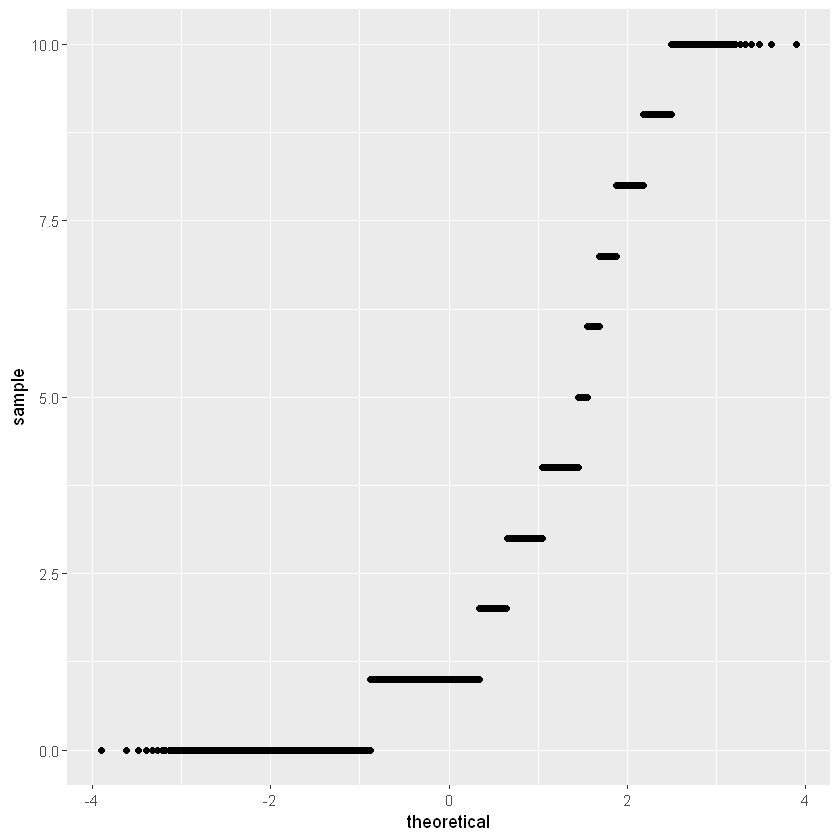

In [29]:
ggplot(medical_raw_data, aes(sample = Children)) + geom_qq() + stat_qq()
options(repr.plot.width=7, repr.plot.height=6)

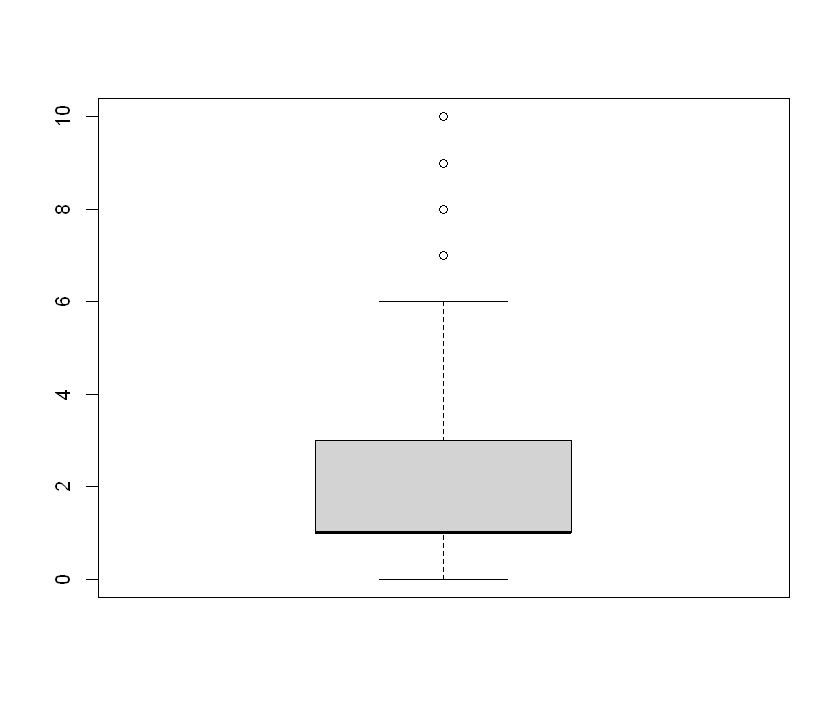

In [30]:
boxplot(medical_raw_data$Children)
options(repr.plot.width=7, repr.plot.height=6)

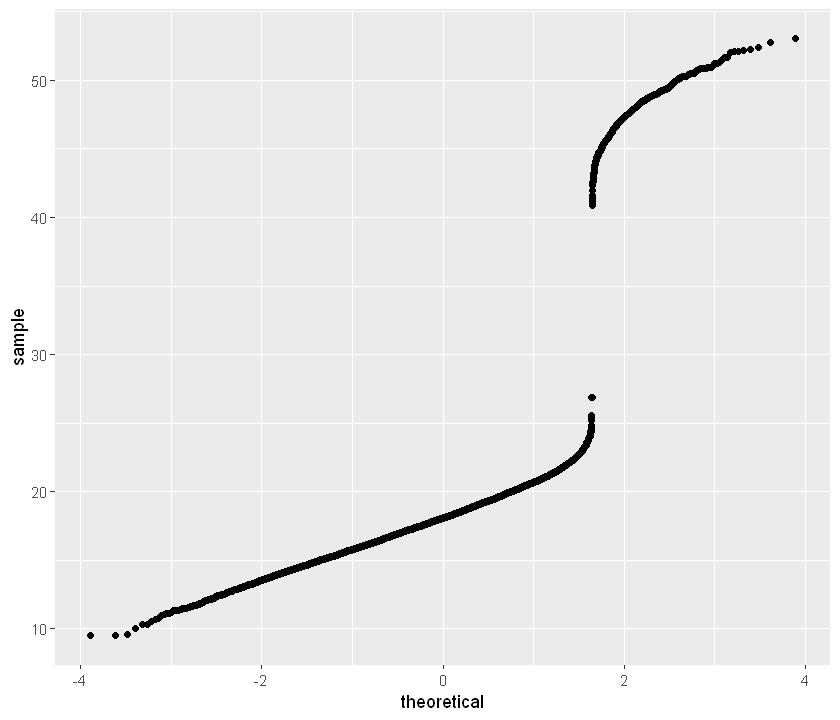

In [31]:
ggplot(medical_raw_data, aes(sample = VitD_levels)) + geom_qq() + stat_qq()
options(repr.plot.width=7, repr.plot.height=6)

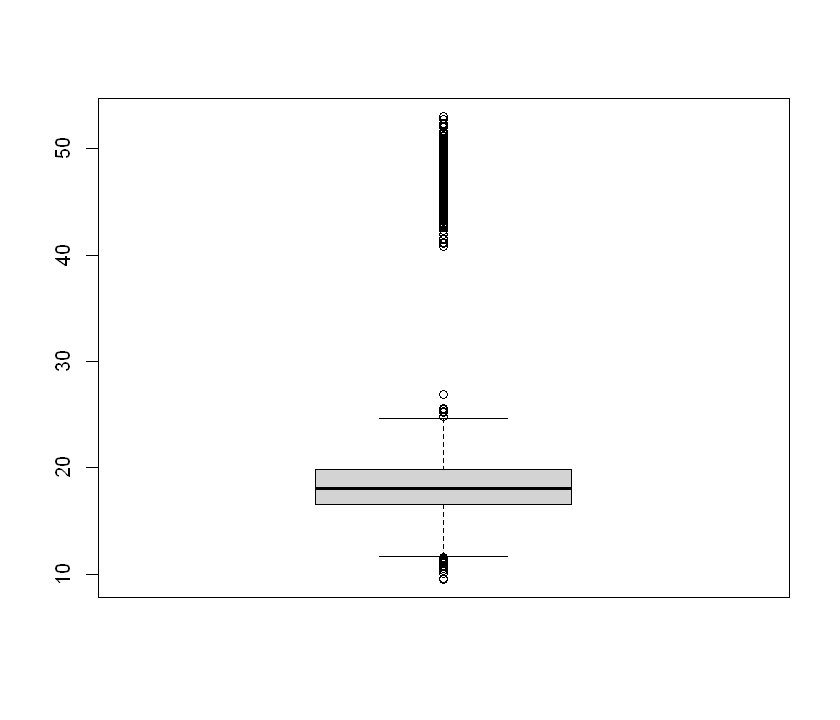

In [32]:
boxplot(medical_raw_data$VitD_levels)
options(repr.plot.width=7, repr.plot.height=6)

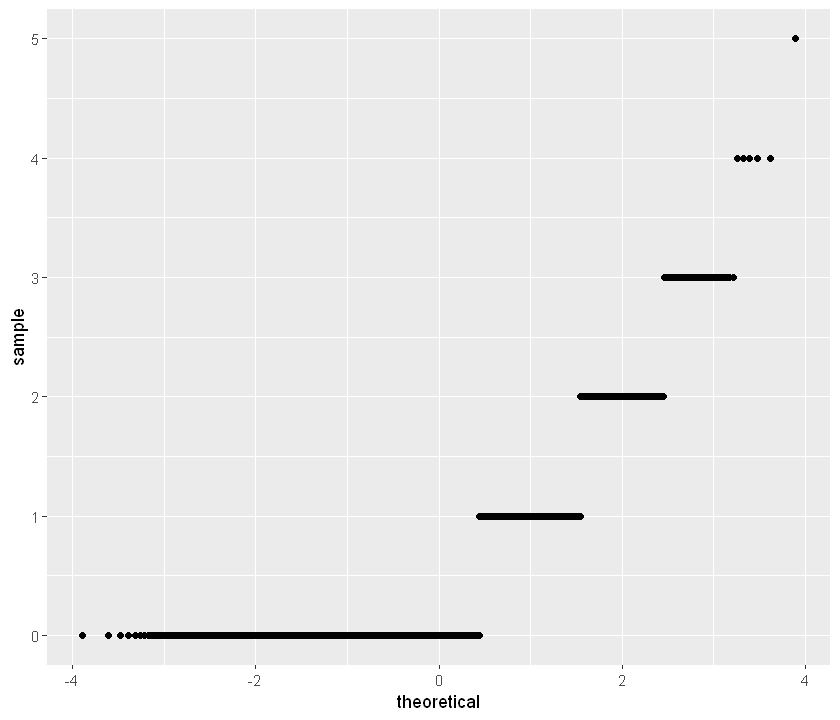

In [33]:
ggplot(medical_raw_data, aes(sample = VitD_supp)) + geom_qq() + stat_qq()
options(repr.plot.width=7, repr.plot.height=6)

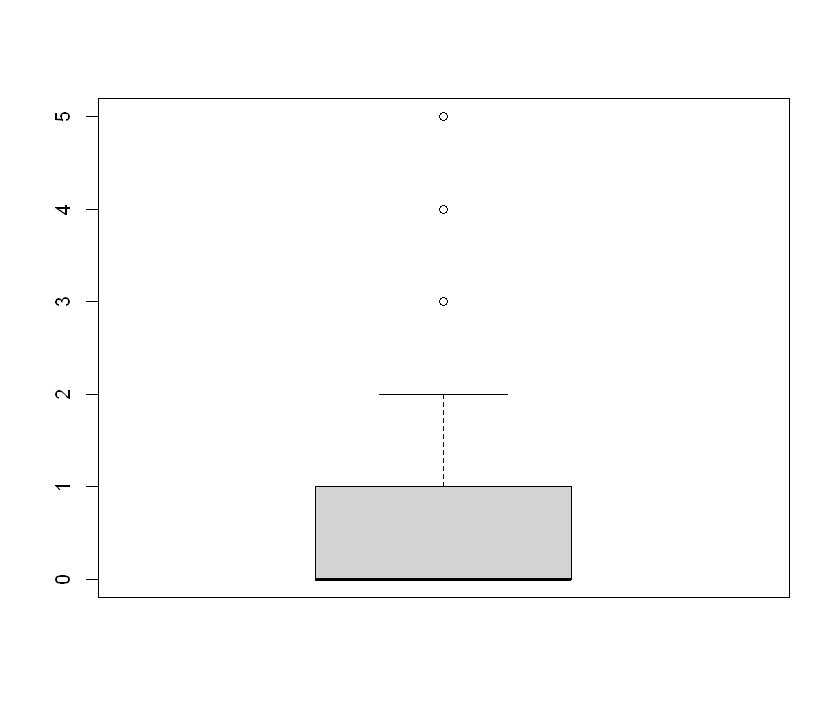

In [34]:
boxplot(medical_raw_data$VitD_supp)
options(repr.plot.width=7, repr.plot.height=6)

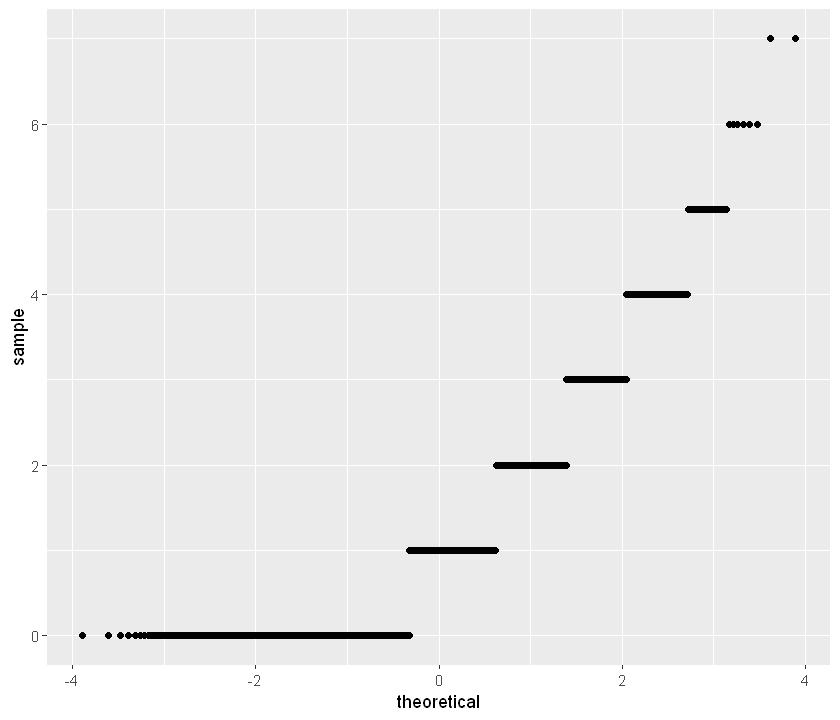

In [35]:
ggplot(medical_raw_data, aes(sample = Full_meals_eaten)) + geom_qq() + stat_qq()
options(repr.plot.width=7, repr.plot.height=6)

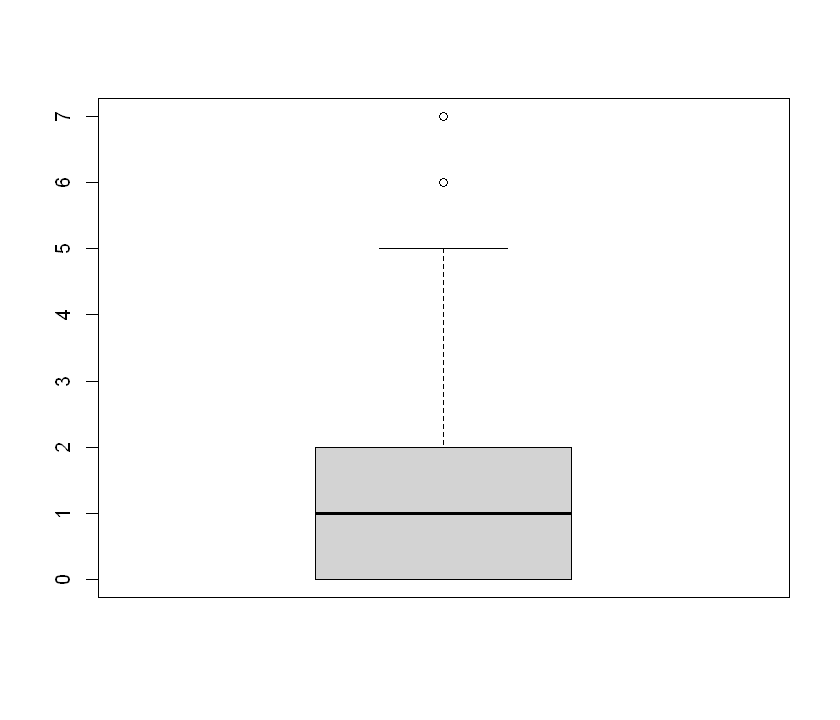

In [36]:
boxplot(medical_raw_data$Full_meals_eaten)
options(repr.plot.width=7, repr.plot.height=6)

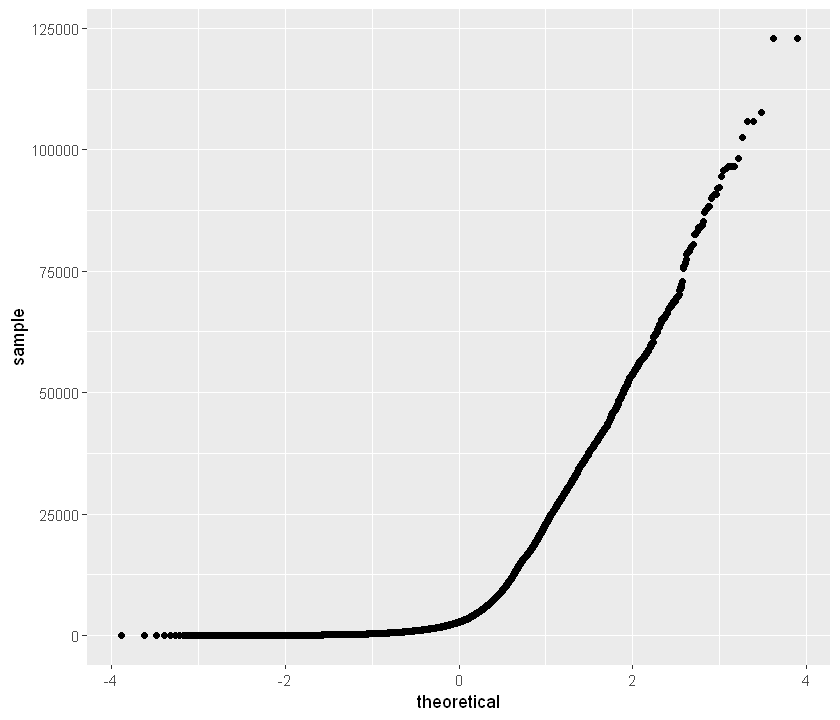

In [37]:
ggplot(medical_raw_data, aes(sample = Population)) + geom_qq() + stat_qq()
options(repr.plot.width=7, repr.plot.height=6)

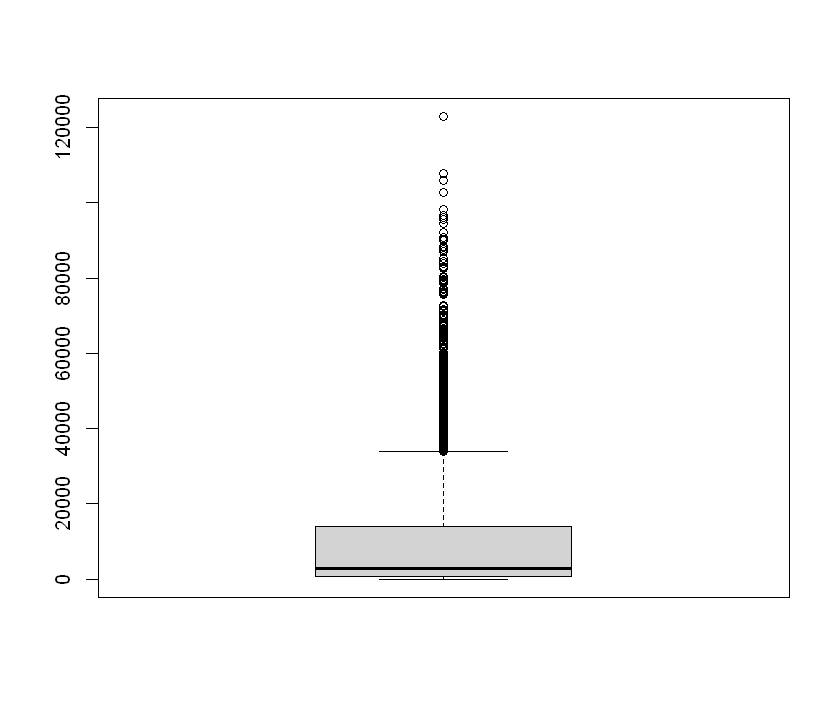

In [38]:
boxplot(medical_raw_data$Population)
options(repr.plot.width=7, repr.plot.height=6)

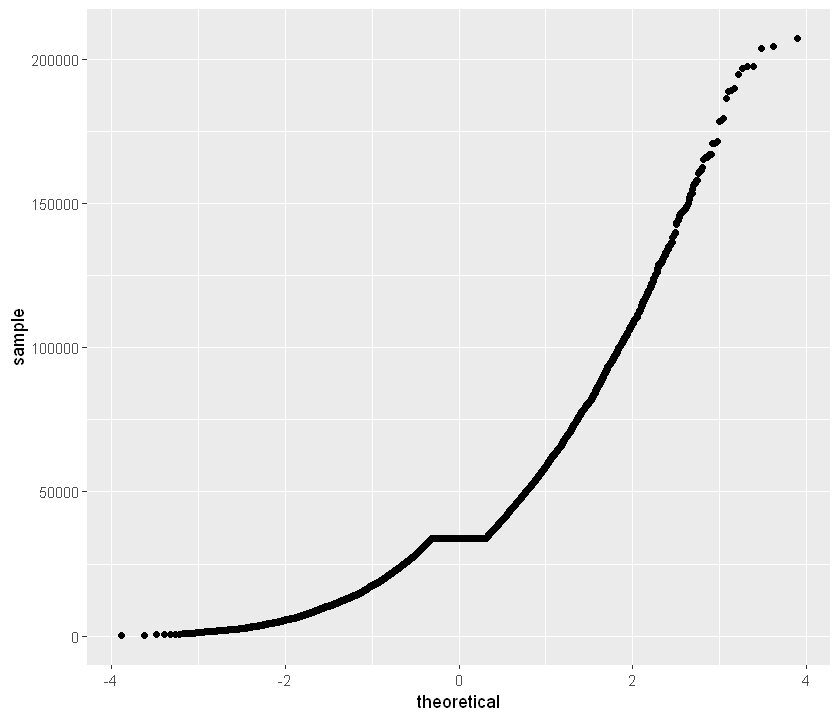

In [39]:
ggplot(medical_raw_data, aes(sample = Household_Income)) + geom_qq() + stat_qq()
options(repr.plot.width=7, repr.plot.height=6)

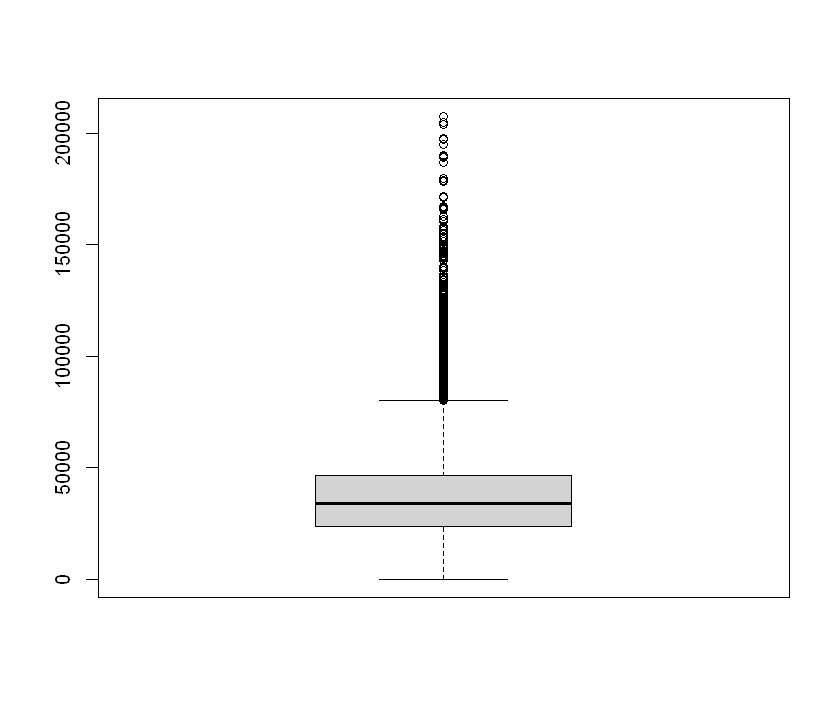

In [40]:
boxplot(medical_raw_data$Household_Income)
options(repr.plot.width=7, repr.plot.height=6)

### The boxplots for the following columns show outliers:
- children
- vitamin D levels
- vitamin D supplements
- full meals eaten
- population
- household income

## 6- Using the summary from above, let's run a hypothesis using the Grubbs test.

In [41]:
x <- medical_raw_data$Children
grubbs.test(x)

x <- medical_raw_data$VitD_levels
grubbs.test(x)

x <- medical_raw_data$VitD_supp
grubbs.test(x)

x <- medical_raw_data$Full_meals_eaten
grubbs.test(x)

x <- medical_raw_data$Children
grubbs.test(x)

x <- medical_raw_data$Population
grubbs.test(x)

x <- medical_raw_data$Household_Income
grubbs.test(x)


	Grubbs test for one outlier

data:  x
G = 4.27028, U = 0.99818, p-value = 0.09681
alternative hypothesis: highest value 10 is an outlier



	Grubbs test for one outlier

data:  x
G = 4.9985, U = 0.9975, p-value = 0.002844
alternative hypothesis: highest value 53.01912416 is an outlier



	Grubbs test for one outlier

data:  x
G = 7.32071, U = 0.99464, p-value = 1.148e-09
alternative hypothesis: highest value 5 is an outlier



	Grubbs test for one outlier

data:  x
G = 5.95030, U = 0.99646, p-value = 1.297e-05
alternative hypothesis: highest value 7 is an outlier



	Grubbs test for one outlier

data:  x
G = 4.27028, U = 0.99818, p-value = 0.09681
alternative hypothesis: highest value 10 is an outlier



	Grubbs test for one outlier

data:  x
G = 7.6122, U = 0.9942, p-value = 1.243e-10
alternative hypothesis: highest value 122814 is an outlier



	Grubbs test for one outlier

data:  x
G = 6.72356, U = 0.99548, p-value = 8.425e-08
alternative hypothesis: highest value 207249.13 is an outlier


##### *A p-value less than 0.05 is statistically significant, in which the null hypothesis is to be rejected.*

##### *A p-value greater than 0.05 is not statistically significant, and the null hypothesis is not rejected.*

##### *The only variable above that was less than 0.05 is VitD_level. All others are not statistically significant*

# 7- The next step is to impute/mitigate the missing NAs because removing them can severely skew the data and cause issues later on when performing further analysis.

In [42]:
colSums(is.na(medical_raw_data))

...1              CaseOrder            Customer_id 
                     0                      0                  10000 
           Interaction                    UID                   City 
                 10000                  10000                  10000 
                 State                 County                    Zip 
                 10000                  10000                      0 
                   Lat                    Lng             Population 
                     0                      0                      0 
                  Area               Timezone                    Job 
                 10000                  10000                  10000 
              Children                    Age              Education 
                     0                      0                  10000 
            Employment       Household_Income                Marital 
                 10000                      0                  10000 
                Gender                ReAdmis            VitD_levels 
                 10000                  10000                      0 
            Doc_visits       Full_meals_eaten              VitD_supp 
                     0                      0                      0 
            Soft_drink          Initial_admin              HighBlood 
                 10000                  10000                  10000 
                Stroke      Complication_risk             Overweight 
                 10000                  10000                      0 
             Arthritis               Diabetes         Hyperlipidemia 
                 10000                  10000                  10000 
              BackPain                Anxiety      Allergic_rhinitis 
                 10000                      0                  10000 
    Reflux_esophagitis                 Asthma               Services 
                 10000                  10000                  10000 
          Initial_days            TotalCharge     Additional_charges 
                     0                      0                      0 
    Survey_TimelyAdmin Survey_TimelyTreatment    Survey_TimelyVisits 
                     0                      0                      0 
    Survey_Reliability         Survey_Options  Survey_HoursTreatment 
                     0                      0                      0 
 Survey_CourteousStaff Survey_ActiveListening 
                     0                      0

In [43]:
# Viewing all of the variables 
ls(medical_raw_data)

[1] "Additional_charges"     "Age"                    "Allergic_rhinitis"     
 [4] "Anxiety"                "Area"                   "Arthritis"             
 [7] "Asthma"                 "BackPain"               "CaseOrder"             
[10] "Children"               "City"                   "Complication_risk"     
[13] "County"                 "Customer_id"            "Diabetes"              
[16] "Doc_visits"             "Education"              "Employment"            
[19] "Full_meals_eaten"       "Gender"                 "HighBlood"             
[22] "Household_Income"       "Hyperlipidemia"         "Initial_admin"         
[25] "Initial_days"           "Interaction"            "Job"                   
[28] "Lat"                    "Lng"                    "Marital"               
[31] "Overweight"             "Population"             "ReAdmis"               
[34] "Reflux_esophagitis"     "Services"               "Soft_drink"            
[37] "State"                  "Stroke"                 "Survey_ActiveListening"
[40] "Survey_CourteousStaff"  "Survey_HoursTreatment"  "Survey_Options"        
[43] "Survey_Reliability"     "Survey_TimelyAdmin"     "Survey_TimelyTreatment"
[46] "Survey_TimelyVisits"    "Timezone"               "TotalCharge"           
[49] "UID"                    "VitD_levels"            "VitD_supp"             
[52] "Zip"

In [44]:
medical_raw_data$Children[is.na(medical_raw_data$Children)]<-median(medical_raw_data$Children, na.rm=TRUE)
medical_raw_data$Age[is.na(medical_raw_data$Age)]<-median(medical_raw_data$Age, na.rm=TRUE)
medical_raw_data$Household_Income[is.na(medical_raw_data$Household_Income)]<-median(medical_raw_data$Household_Income, na.rm=TRUE)
medical_raw_data$Overweight[is.na(medical_raw_data$Overweight)]<-median(medical_raw_data$Overweight, na.rm=TRUE)
medical_raw_data$Anxiety[is.na(medical_raw_data$Anxiety)]<-median(medical_raw_data$Anxiety, na.rm=TRUE)
medical_raw_data$Soft_drink[is.na(medical_raw_data$Soft_drink)]<-median(medical_raw_data$Soft_drink, na.rm=TRUE)
# (Hadley Wickham & Garrett Grolemund, 2017)

## I'll need to subset the data to do the PCA without the variables with NAs.

### Data Cleaning Limitations, Strengths, and Weaknesses:
*Strengths:*
- Nearly all of the values are numeric, facilitating easier calculations, visualizations, and conversions.
- Multiple variables made it easy to have options with a research question. I saw possibilities with Age, Children, Doc_Visits, Overweight, and many others.
*Weaknesses:*
- We do not have access to the original people who created the data.
- There was a grand part of the data that was missing, eliminating the chances of analyzing *that* part of it.
- Perhaps a better cleaning decision could have been made if we knew the purpose of the data.
- One unclear variable was VitD_supp, which describes the number of times a patient takes the supplement. What we do not know is if this is daily, weekly, or throughout the stay in the facility while admitted.

# Part 3- E: The cleaning process is officially complete! We may now proceed to our final step: The Principal Component Analysis (PCA).
#### *The PCA identifies variance within a data set's variables and makes it easy to explore data to understand key variables and further confirm outliers.*
#### A PCA will allow us to see the variables that have a strong relationship with others, and the ones who don't.
#### It also allows for us to work with the important variables as opposed to those who are not.

##### I will take a look at the columns once more to remember in what place the variables I need to work with are.

In [45]:
colnames(medical_raw_data)

[1] "...1"                   "CaseOrder"              "Customer_id"           
 [4] "Interaction"            "UID"                    "City"                  
 [7] "State"                  "County"                 "Zip"                   
[10] "Lat"                    "Lng"                    "Population"            
[13] "Area"                   "Timezone"               "Job"                   
[16] "Children"               "Age"                    "Education"             
[19] "Employment"             "Household_Income"       "Marital"               
[22] "Gender"                 "ReAdmis"                "VitD_levels"           
[25] "Doc_visits"             "Full_meals_eaten"       "VitD_supp"             
[28] "Soft_drink"             "Initial_admin"          "HighBlood"             
[31] "Stroke"                 "Complication_risk"      "Overweight"            
[34] "Arthritis"              "Diabetes"               "Hyperlipidemia"        
[37] "BackPain"               "Anxiety"                "Allergic_rhinitis"     
[40] "Reflux_esophagitis"     "Asthma"                 "Services"              
[43] "Initial_days"           "TotalCharge"            "Additional_charges"    
[46] "Survey_TimelyAdmin"     "Survey_TimelyTreatment" "Survey_TimelyVisits"   
[49] "Survey_Reliability"     "Survey_Options"         "Survey_HoursTreatment" 
[52] "Survey_CourteousStaff"  "Survey_ActiveListening"

## First, I will conduct standardization/subsetting on the variables I need to answer my research question, which are the numeric ones.

In [46]:
# To make sure we don't have infinite values
library("IDPmisc")
medical <- NaRV.omit(medical_raw_data)

In [49]:
# Double check that there are no NAs left
is.na(medical_raw_data)

...1,CaseOrder,Customer_id,Interaction,UID,City,State,County,Zip,Lat,...,TotalCharge,Additional_charges,Survey_TimelyAdmin,Survey_TimelyTreatment,Survey_TimelyVisits,Survey_Reliability,Survey_Options,Survey_HoursTreatment,Survey_CourteousStaff,Survey_ActiveListening
FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,TRUE,TRUE,TRUE,TRUE,TRUE,TRUE,FALSE,FALSE,...,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


In [50]:
# Subset the data to ONLY numeric
RefinedMedical <- select(medical_raw_data, c(-Customer_id, -Interaction, -UID, -Marital, -City, -State, -County, -Zip, -Lat, -Lng, -Population, -Area, -Timezone,
-Job, -Education, -Employment, -Gender, -ReAdmis, -Soft_drink, -Initial_admin, -HighBlood, -Stroke,
-Complication_risk, -Arthritis, -Diabetes, -Hyperlipidemia, -BackPain, -Allergic_rhinitis,
-Reflux_esophagitis, -Asthma, -Services))
head(RefinedMedical)

...1,CaseOrder,Children,Age,Household_Income,VitD_levels,Doc_visits,Full_meals_eaten,VitD_supp,Overweight,...,TotalCharge,Additional_charges,Survey_TimelyAdmin,Survey_TimelyTreatment,Survey_TimelyVisits,Survey_Reliability,Survey_Options,Survey_HoursTreatment,Survey_CourteousStaff,Survey_ActiveListening
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,1,53,86575.93,17.80233,6,0,0,0,...,3191.049,17939.403,3,3,2,2,4,3,3,4
2,2,3,51,46805.99,18.99464,4,2,1,1,...,4214.905,17612.998,3,4,3,4,4,4,3,3
3,3,3,53,14370.14,17.41589,4,1,0,1,...,2177.587,17505.192,2,4,4,4,3,4,3,3
4,4,0,78,39741.49,17.42008,4,1,0,0,...,2465.119,12993.437,3,5,5,3,4,5,5,5
5,5,1,22,1209.56,16.87052,5,0,2,0,...,1885.655,3716.526,2,1,3,3,5,3,4,3
6,6,1,76,33942.28,19.95614,6,0,0,1,...,2774.090,12742.590,4,5,4,4,3,5,4,6


#### Standardization is the process of converting data into a format that facilitates usability to process and analyze it.


## The Principal Component Analysis

In [51]:
medical_pca <- prcomp(RefinedMedical, center = TRUE, scale = TRUE) # (Larose & Larose, 2019)
medical_pca 

Standard deviations (1, .., p=22):
 [1] 1.789624e+00 1.716107e+00 1.288322e+00 1.275410e+00 1.201727e+00
 [6] 1.018577e+00 1.014135e+00 1.003654e+00 9.963409e-01 9.923390e-01
[11] 9.888096e-01 9.858613e-01 8.772767e-01 8.355682e-01 7.672901e-01
[16] 7.306250e-01 6.883973e-01 6.151501e-01 5.726950e-01 5.465447e-01
[21] 2.278506e-01 1.841197e-15

Rotation (n x k) = (22 x 22):
                                PC1           PC2          PC3          PC4
...1                    0.512379792  0.0938248374 -0.058560155 -0.036585993
CaseOrder               0.512379792  0.0938248374 -0.058560155 -0.036585993
Children               -0.001096912  0.0022857560 -0.011256099  0.018350833
Age                     0.006047520  0.0025433129  0.234260988  0.650405908
Household_Income       -0.009193256 -0.0045637383  0.017111636 -0.011497962
VitD_levels             0.141803986  0.0271424688  0.157824356  0.102100640
Doc_visits             -0.005964344  0.0058804680  0.011014278  0.008736205
Full_meals_eate

Warning message:
"ggrepel: 9 unlabeled data points (too many overlaps). Consider increasing max.overlaps"


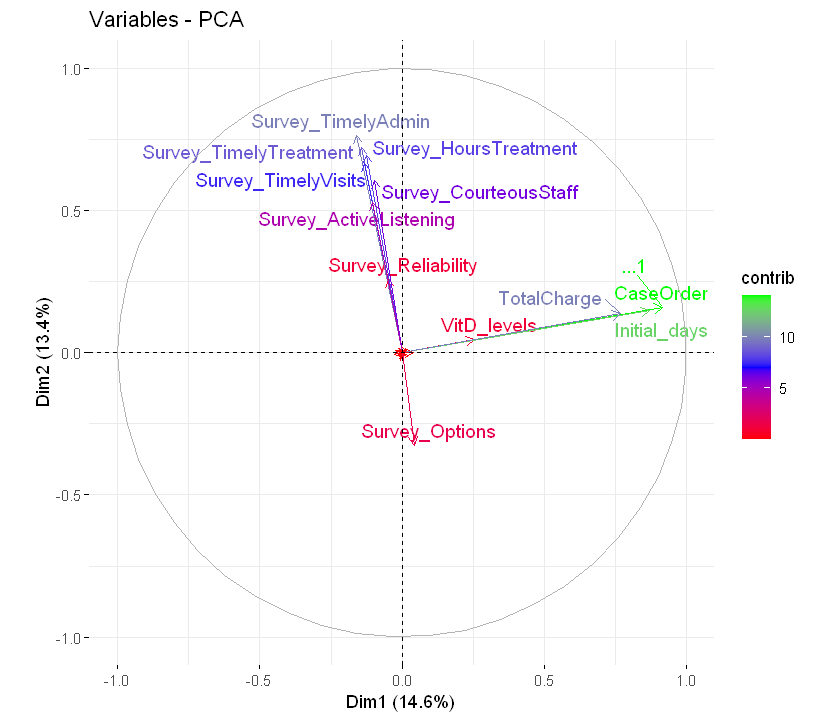

In [52]:
fviz_pca_var(medical_pca, col.var = "contrib", gradient.cols = c("red", "blue", "green"),
repel = TRUE, nudge_x = 8, max.overlaps = 30)

# Scree Plot

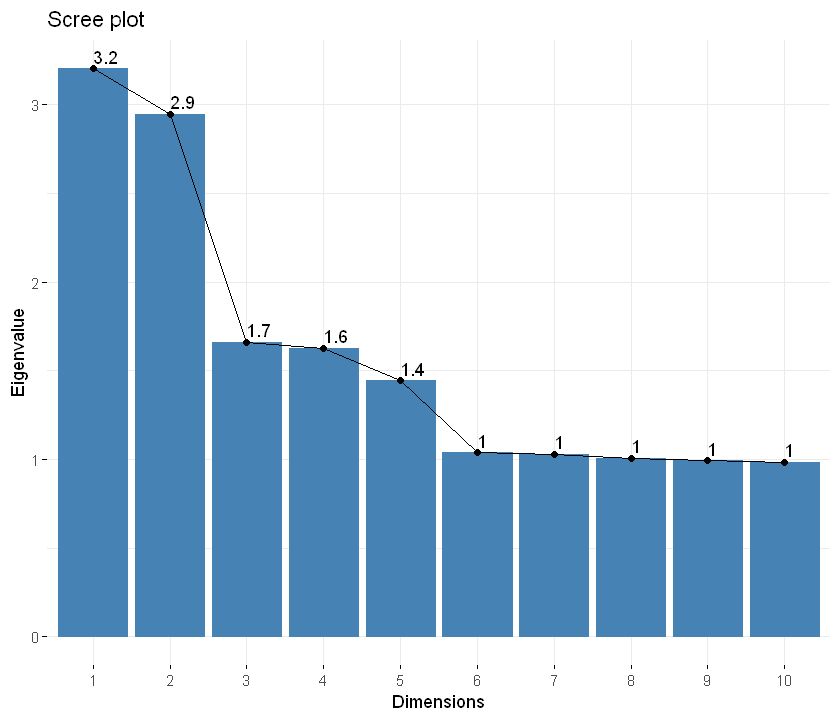

In [53]:
fviz_eig(medical_pca, choice = "eigenvalue", addlabels = TRUE)

# PCA results:
I ran the PCA using the packages FactoMineR and factoextra. Then, I created a scree plot to show the number of principal components and eigenvalues. The essential variables in PC1 turned out to be all of the survey questions: timely admin, timely treatment, timely visits, active listening, reliability, hours treatment, and courteous staff. All except for survey_options were in PC1, which was in PC3. In PC2, the most essential ones were total charge, vitamin D levels, case order, initial days, and the unnamed ...1 variable. As a result of the two graphs above, case order, total charge, and initial days seem to be correlated. On the other hand, all of the survey questions seem to be correlated with each other and not the other variables. Hospitals can benefit from an in-depth analysis, actionable insights, and an attempt to reduce doctor visits by age. Those three clusters were the three groups, and the fourth slice in the graph was empty in variables. 

# How can the PCA benefit the hospital?
Comparing all of the variables in this medical data can help a hospital have a better understanding of the relationship in the variables. Furthermore, this can help them be more informed about the readmission rates with an in-depth analysis, using it to take more actions to reduce readmissions in the future. Using the aspect of the surveys, seeing patient satisfactory or unsatisfactory can help determine whether patients will most likely go to a certain hospital. Next, according to vitamin D levels, whether low or high may also determine that. Next, initial days may give hospitals a great insight on patients getting the correct treatment, preventive care, and disease management. Lastly, total charge may be one of the largest factors in whether a patient is more likely to be admitted. Perhaps this can be analyzed with patient income and job status to see whether the patient can afford to return to the hospital, and if they have the funds to pay back the hospital bill.

### Finally, the very last step is to write the clean data to CSV using the code below:

##### Installing the package I need below to write the clean data to a CSV file:

In [54]:
install.packages("data.table")
library("data.table")
(warn = - 1) # Disable warning messages globally

fwrite(RefinedMedical,"C:\\Users\\jesse\\Documents\\WGU\\Data Cleaning\\CleanMedicalData.csv")

Installing package into 'C:/Users/jesse/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'data.table' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\jesse\AppData\Local\Temp\Rtmp2Xj595\downloaded_packages


Warning message:
"package 'data.table' was built under R version 4.1.3"

Attaching package: 'data.table'


The following object is masked from 'package:purrr':

    transpose


The following objects are masked from 'package:dplyr':

    between, first, last




[1] -1

# Part IV. Supporting Documents

F. Panopto recording linked is included separately 

G. References are included below

H. Citations and in-text referencing are included throughout the document

*References*

Hadley Wickham & Garrett Grolemund. (2017). R for data science: Import, tidy, transform, visualize, and model data. Shroff/O'Reilly; First edition.

Larose, C. D., & Larose, D. T. (2019). Data science using python and r. John Wiley & Sons,inc,.

Zach. (2020, October 27). How to export a data frame to a CSV file in R (with examples). Statology. Retrieved July 17, 2022, from https://www.statology.org/export-data-frame-to-csv-in-r/ 
